<a href="https://colab.research.google.com/github/Rajdeep-G/ML_basics/blob/master/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

Importing the csv files

In [ ]:
movies = pd.read_csv('movies.csv')
movies.head()
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  291003  ratings of  62423  movies.


# Function to get the genre ratings

In [6]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

# Calculate the average rating of romance and scifi movies

In [7]:
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.17,3.70
2,3.16,4.02
3,3.53,3.70
4,3.45,3.16
5,3.55,4.09


# Function to get the biased dataset

In [8]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset
# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)
# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  302


,index,avg_romance_rating,avg_scifi_rating
0,4,3.45,3.16
1,7,4.17,3.00
2,12,3.42,3.07
3,27,4.41,3.14
4,30,2.70,4.21


In [11]:
print(biased_dataset)

     index  avg_romance_rating  avg_scifi_rating
0        4                3.45              3.16
1        7                4.17              3.00
2       12                3.42              3.07
3       27                4.41              3.14
4       30                2.70              4.21
..     ...                 ...               ...
297   1105                3.50              2.50
298   1106                3.50              2.95
299   1110                2.00              4.50
300      1                4.17              3.70
301      2                3.16              4.02

[302 rows x 3 columns]


In [16]:
X = biased_dataset.iloc[:,1:3].values
print(X)

[[3.45 3.16]
 [4.17 3.  ]
 [3.42 3.07]
 [4.41 3.14]
 [2.7  4.21]
 [2.53 2.03]
 [2.75 2.6 ]
 [3.53 2.93]
 [4.2  3.  ]
 [3.82 3.  ]
 [4.12 2.83]
 [3.78 2.5 ]
 [3.55 2.81]
 [3.29 3.  ]
 [3.21 2.99]
 [3.33 3.  ]
 [3.29 2.86]
 [3.   1.  ]
 [3.57 2.85]
 [3.97 2.33]
 [2.75 4.27]
 [3.53 2.76]
 [3.82 2.8 ]
 [4.13 3.08]
 [3.73 2.89]
 [3.61 3.18]
 [3.14 3.  ]
 [3.4  3.  ]
 [2.87 2.88]
 [3.1  2.36]
 [2.91 2.5 ]
 [3.33 2.44]
 [3.16 3.12]
 [3.33 3.12]
 [3.33 2.33]
 [3.25 2.29]
 [2.5  3.5 ]
 [3.59 3.  ]
 [3.94 2.25]
 [3.53 2.86]
 [2.64 3.12]
 [2.75 2.62]
 [3.33 1.5 ]
 [3.27 3.17]
 [3.25 3.  ]
 [3.05 2.92]
 [2.5  4.36]
 [2.75 3.6 ]
 [3.5  2.8 ]
 [2.73 2.96]
 [4.08 3.12]
 [2.75 1.5 ]
 [3.91 2.55]
 [3.65 3.19]
 [3.   3.18]
 [2.67 3.  ]
 [2.73 3.56]
 [2.78 4.43]
 [3.29 3.1 ]
 [2.77 2.73]
 [3.33 3.14]
 [3.39 3.18]
 [3.37 2.11]
 [4.08 2.83]
 [2.99 2.53]
 [2.83 2.65]
 [4.1  2.96]
 [2.78 2.92]
 [2.98 3.08]
 [2.73 3.89]
 [3.46 3.11]
 [3.   2.83]
 [3.92 2.62]
 [3.43 2.89]
 [2.42 3.  ]
 [2.82 3.2 ]
 [2.67 2.38]

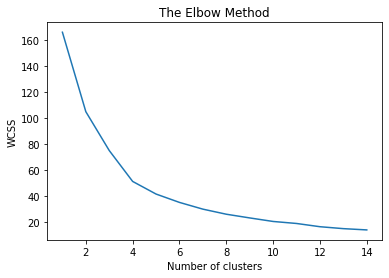

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

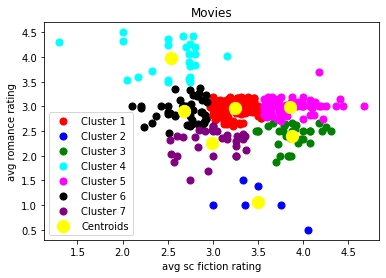

In [28]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 50, c = 'black', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 50, c = 'purple', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Movies')
plt.ylabel('avg romance rating')
plt.xlabel('avg sc fiction rating')
plt.legend()
plt.show()